# CIFAR training

# 训练

In [10]:
import tensorflow as tf

cifardata = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifardata.load_data()
class_label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [11]:
# 图片灰度处理
# x_train = tf.image.rgb_to_grayscale(x_train)


# x_train = x_train.reshape(50000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
# y_train = y_train.reshape(50000, 1).transpose(0, 1).astype("int32")

# x_test = x_test.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
# y_test = y_test.reshape(10000, 1).transpose(0, 1).astype("int32")

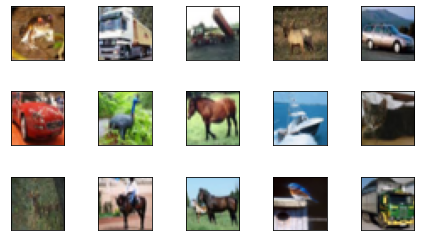

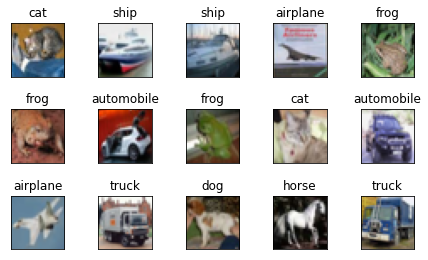

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(15):
    # 每行3个，共计五行，按顺序放手写图片
    plt.subplot(3,5,i+1)
    #自动适配图片尺寸
    plt.tight_layout() 
    plt.imshow(x_train[i])
    #y_train为一维数组，需要获取对应的值
#     plt.title("{}".format(class_label[y_train[i][0]]))
    #坐标轴设置
    plt.xticks([])
    plt.yticks([])
plt.show()

for i in range(15):
    # 每行3个，共计五行，按顺序放手写图片
    plt.subplot(3,5,i+1)
    #自动适配图片尺寸
    plt.tight_layout() 
    plt.imshow(x_test[i])
    #y_train为一维数组，需要获取对应的值
    plt.title("{}".format(class_label[y_test[i][0]]))
    #坐标轴设置
    plt.xticks([])
    plt.yticks([])
plt.show()

In [13]:
# 标签数据one-hot编码
y_train = tf.squeeze(y_train)
y_train = tf.one_hot(y_train, depth=10)

y_test = tf.squeeze(y_test)
y_test = tf.one_hot(y_test, depth=10)

In [15]:
# 模型定义
inputs = tf.keras.Input(shape=(32, 32, 3))
# x = tf.keras.layers.Flatten(input_shape=(32, 32, 3))(inputs)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
# x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization(axis=3)(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
# x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization(axis=3)(x)

x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
# x = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization(axis=3)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       

In [16]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
   1/1563 [..............................] - ETA: 12:58 - loss: 2.5275 - accuracy: 0.0625

2022-06-12 13:13:19.375543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 27s 17ms/step - loss: 1.3604 - accuracy: 0.5135
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0104 - accuracy: 0.6436
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8554 - accuracy: 0.7035
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7663 - accuracy: 0.7300
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7004 - accuracy: 0.7572
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6499 - accuracy: 0.7772
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6098 - accuracy: 0.7895
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5748 - accuracy: 0.8012
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5445 - accuracy: 0.8119
Epoch 10/10
1563/1563 [==============================] - 310s 198ms/step - 

In [7]:
model.evaluate(x_test, y_test)

 13/313 [>.............................] - ETA: 2s - loss: 0.6621 - accuracy: 0.7812

2022-06-12 10:23:42.221918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.7339 - accuracy: 0.7573


[0.7338932752609253, 0.7573000192642212]

In [7]:
model.save("cifar")

INFO:tensorflow:Assets written to: cifar/assets


INFO:tensorflow:Assets written to: cifar/assets


In [14]:
import numpy as np
predictions = model.predict(x_test)
print("预测：",np.argmax(predictions[4]), class_label[np.argmax(predictions[4])]) # np.argmax(predictions[3]) 概率最大的标签列

313/313 [==============================] - 3s 9ms/step
预测： 6 frog
